# Module 1, Practical 8

In this practical we will practice Pandas.

## Libraries installation


First things first. Let's start off by installing the required libraries. In particular we will need three libraries. Try and see if they are already available by typing the following commands in the console or put them in a python script:
```
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
```

if, upon execution, you do not get any error messages, you are sorted. Otherwise, you need to install them.

In **Linux** you can install the libraries by typing in a terminal ```sudo pip3 install matplotlib```, ```sudo pip3 install pandas``` and ```sudo pip3 install numpy``` (or ```sudo python3.X -m pip install matplotlib```, ```sudo python3.X -m pip install pandas``` and ```sudo python3.X -m pip install numpy```), where X is your python version.

In **Windows** you can install the libraries by typing in the command prompt (to open it type ```cmd``` in the search box) ```pip3 install matplotlib```, ```pip3 install pandas``` and ```pip3 install numpy```. If you are using anaconda you need to run these commands from the *anaconda prompt*.

**Please install them in this order** (i.e. **matplotlib** first, then **pandas** and finally **numpy**). You might not need to install numpy as matplotlib requires it. Once done that, try to perform the above imports again and they should work this time around.

## Pandas 
Pandas (the name comes from *panel data*) is a very efficient library to deal with numerical tables and time series. It is a quite complex library and here we will only scratch the surface of it. You can find a lot of information including the documentation on the [Pandas website](http://pandas.pydata.org). 

In particular the library pandas provides two data structures: **Series** and **DataFrames**.    

## Series

Series are 1-dimensional structures (like lists) containing data. Series are characterized by two types of information: the **values** and the **index** (a list of labels associated to the data), therefore they are a bit like a list and a bit like a dictionary. The index is optional and can be added by the library if not specified.

### How to define and access a Series

There are several ways to define a Series. We can specify both the values and the index explicitly, or through a dictionary, or let python add the default index for us. We can access the index with the **Series.index** method and the values with the **Series.values**. 

In [1]:
import pandas as pd
import random

print("Values and index explicitly defined")
#values and index explicitely defined
S = pd.Series([random.randint(0,20) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))

print(S)
print("The index:", S.index)
print("The values:", S.values)

print("------------------------\n")
print("From dictionary")
#from a dictionary
S1 = pd.Series({"one" : 1, "two" : 2, "ten": 10, 
                "three" : 3, "four": 4, "forty" : 40})
print(S1)
print(S1.index)
print(S1.values)
print("------------------------\n")
print("Default index")
#index added by default
myData = [random.randint(0,10) for x in range(10)]
S2 = pd.Series(myData)

print(S2)
print(S2.index)
print(S2.values)

print("------------------------\n")
print("Same value repeated")
S3 = pd.Series(1.27, range(10))
print(S3)
print(S3.index)
print(S3.values)

Values and index explicitly defined
A     1
B     9
C     4
D     7
E    20
F     7
G    13
H    10
I     4
L     8
dtype: int64
The index: Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L'], dtype='object')
The values: [ 1  9  4  7 20  7 13 10  4  8]
------------------------

From dictionary
one       1
two       2
ten      10
three     3
four      4
forty    40
dtype: int64
Index(['one', 'two', 'ten', 'three', 'four', 'forty'], dtype='object')
[ 1  2 10  3  4 40]
------------------------

Default index
0    3
1    3
2    2
3    0
4    3
5    8
6    2
7    3
8    7
9    7
dtype: int64
RangeIndex(start=0, stop=10, step=1)
[3 3 2 0 3 8 2 3 7 7]
------------------------

Same value repeated
0    1.27
1    1.27
2    1.27
3    1.27
4    1.27
5    1.27
6    1.27
7    1.27
8    1.27
9    1.27
dtype: float64
RangeIndex(start=0, stop=10, step=1)
[1.27 1.27 1.27 1.27 1.27 1.27 1.27 1.27 1.27 1.27]


Data in a series can be accessed by using the **label** (i.e. the index) as in a dictionary or through its **position** as in a list. Slicing is also allowed both by **position** and **index**. In the latter case, we can do ```Series[S:E]``` with **S and E indexes**, both **S and E are included**. 

It is also possible to retrieve some elements by passing a **list** of positions or indexes. **Head** and **tail** methods can also be used to retrieve the top or bottom N elements with **Series.head(N)** or **Series.tail(N)**.

<div class="alert alert-info">

**Note:** When the method returns more than one element, the return type is a Series.

</div>

In [2]:
import pandas as pd
import random

#values and index explicitely defined
S = pd.Series([random.randint(0,20) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))
print(S)
print("")

print("Value at label \"A\":", S["A"])
print("Value at index 1:", S[1])
print("")

print("Slicing from 1 to 3:") #note 3 excluded
print(S[1:3])
print("")
print("Slicing from C to H:") #note H included!
print(S["C":"H"])
print("")

print("Retrieving from list:")
print(S[[1,3,5,7,9]])
print(S[["A","C","E","G"]])
print("")

print("Top 3")
print(S.head(3))
print("")
print("Bottom 3")
print(S.tail(3))

A     1
B    19
C    10
D     5
E     9
F    12
G     9
H     4
I    12
L    10
dtype: int64

Value at label "A": 1
Value at index 1: 19

Slicing from 1 to 3:
B    19
C    10
dtype: int64

Slicing from C to H:
C    10
D     5
E     9
F    12
G     9
H     4
dtype: int64

Retrieving from list:
B    19
D     5
F    12
H     4
L    10
dtype: int64
A     1
C    10
E     9
G     9
dtype: int64

Top 3
A     1
B    19
C    10
dtype: int64

Bottom 3
H     4
I    12
L    10
dtype: int64


### Operator broadcasting

Operations can automatically be broadcast to the entire Series. This is a quite cool feature and saves us from looping through the elements of the Series.

**Example:**
Given a list of 10 integers and we want to divide them by 2. Without using pandas we would:


In [3]:
import random

listS = [random.randint(0,20) for x in range(0,10)]

print(listS)

for el in range(0,len(listS)):
    listS[el] /=2  #compact of X = X / 2
    
print(listS)

[11, 9, 18, 16, 3, 19, 12, 7, 14, 17]
[5.5, 4.5, 9.0, 8.0, 1.5, 9.5, 6.0, 3.5, 7.0, 8.5]


With pandas instead:

In [4]:
import pandas as pd
import random

S = pd.Series([random.randint(0,20) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))

print(S)
print("")
S1 = S / 2
print(S1)

A     9
B     0
C     5
D     7
E     1
F    18
G    10
H    18
I     4
L    18
dtype: int64

A    4.5
B    0.0
C    2.5
D    3.5
E    0.5
F    9.0
G    5.0
H    9.0
I    2.0
L    9.0
dtype: float64


### Filtering

We can also apply boolean operators to obtain only the **sub-Series** with all the values satisfying a specific condition. This allows us to **filter** the Series.

Calling the boolean operator on the series alone (e.g. S > 10) will return a Series with True at the indexes where the condition is met, False at the others. Passing such a Series to a Series of the same length will return only the elements where the condition is True. Check the code below to see this in action.

In [5]:
import pandas as pd
import random

S = pd.Series([random.randint(0,20) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))

print(S)
print("")
S1 = S>10
print(S1)
print("")
S2 = S[S > 10]
print(S2)

A     0
B     5
C     0
D    11
E     6
F    14
G    18
H    15
I     0
L     0
dtype: int64

A    False
B    False
C    False
D     True
E    False
F     True
G     True
H     True
I    False
L    False
dtype: bool

D    11
F    14
G    18
H    15
dtype: int64


### Missing data

Operations involving Series might have to deal with missing data or non-valid values (both cases are represented as  **NaN**, that is **not a number**). Operations are carried out by aligning the Series based on their **indexes**. Indexes not in common end up in NaN values. Although most of the operations that can be performed on series quite happily deal with NaNs, it is possible to **drop** NaN values or to **fill** them (i.e. replace their value with some other value). The sytax is:
```
Series.dropna()
```
or
```
Series.fillna(some_value)
```
**Note that these operations do not modify the Series but rather return a new Series**.

In [6]:
import pandas as pd
import random

S = pd.Series([random.randint(0,10) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))

S1 = pd.Series([random.randint(0,10) for x in range(0,8)], 
              index = list("DEFGHAZY"))

print("The dimensions of these Series:", S.shape)
print("")
print(S1)
print("---- S + S1 ----")
Ssum = S + S1
print(Ssum)
print("---- Dropping NaNs ----")
print(Ssum.dropna())
print("---- Filling NaNs ----")
print(Ssum.fillna("my_value"))

The dimensions of these Series: (10,)

D    8
E    3
F    0
G    8
H    9
A    5
Z    1
Y    1
dtype: int64
---- S + S1 ----
A     5.0
B     NaN
C     NaN
D    15.0
E    12.0
F     4.0
G     9.0
H    18.0
I     NaN
L     NaN
Y     NaN
Z     NaN
dtype: float64
---- Dropping NaNs ----
A     5.0
D    15.0
E    12.0
F     4.0
G     9.0
H    18.0
dtype: float64
---- Filling NaNs ----
A           5
B    my_value
C    my_value
D          15
E          12
F           4
G           9
H          18
I    my_value
L    my_value
Y    my_value
Z    my_value
dtype: object


### Computing stats

Pandas offers several operators to compute stats on the data stored in a Series. These include basic stats like **min**, **max** (and relative indexes with **argmin** and **argmax**) **mean**, **std**, **quantile** (to get the quantiles). A description of the data can be obtained by using the method **describe** and the counts for each value can be obtained by **value_counts**. Other methods available are **sum** and **cumsum** (for the sum and cumulative sum of the elements), **autocorr** and **corr** (for autocorrelation and correlation) and many others. For a complete list check the [Pandas reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). 

**Note: as said before, when these methods do not return a single value, they return a Series.**

**Example:**
Fill the previous Series with the mean values of the series rather than NaNs.

In [7]:
Ssum = S + S1
print(Ssum)
print("---- Filling with avg value ----")
print(Ssum.fillna(Ssum.mean()))
print("Min:{} (index: {}) Max: {} (index: {})".format(Ssum.min(),
                                                      Ssum.argmin(), 
                                                      Ssum.max(), 
                                                      Ssum.argmax()))


A     5.0
B     NaN
C     NaN
D    15.0
E    12.0
F     4.0
G     9.0
H    18.0
I     NaN
L     NaN
Y     NaN
Z     NaN
dtype: float64
---- Filling with avg value ----
A     5.0
B    10.5
C    10.5
D    15.0
E    12.0
F     4.0
G     9.0
H    18.0
I    10.5
L    10.5
Y    10.5
Z    10.5
dtype: float64
Min:4.0 (index: 5) Max: 18.0 (index: 7)


Let's see some operators introduced above in action.

In [8]:
import pandas as pd
import random

S = pd.Series([random.randint(0,10) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))
print("The data:")
print(S)
print("")
print("Its description")
print(S.describe())
print("")
print("Specifying different quantiles:")
print(S.quantile([0.1,0.2,0.8,0.9]))
print("")
print("Histogram:")
print(S.value_counts())
print("")
print("The type is a Series:")
print(type(S.value_counts()))
print("Summing the values:")
print(S.sum())
print("")
print("The cumulative sum:")
print(S.cumsum())

The data:
A     0
B     8
C     5
D    10
E     5
F     7
G     0
H     7
I     9
L     9
dtype: int64

Its description
count    10.000000
mean      6.000000
std       3.559026
min       0.000000
25%       5.000000
50%       7.000000
75%       8.750000
max      10.000000
dtype: float64

Specifying different quantiles:
0.1    0.0
0.2    4.0
0.8    9.0
0.9    9.1
dtype: float64

Histogram:
9     2
7     2
5     2
0     2
10    1
8     1
dtype: int64

The type is a Series:
<class 'pandas.core.series.Series'>
Summing the values:
60

The cumulative sum:
A     0
B     8
C    13
D    23
E    28
F    35
G    35
H    42
I    51
L    60
dtype: int64


**Example**:

Create two Series from the lists [2, 4, 6, 8, 10, 12, 13, 14, 15, 16], [1, 3, 5, 7, 9, 11, 13, 14, 15, 16] using the same index for both: ['9B47', '468B', 'B228', '3C52', 'AE2E', 'DFF6', 'C38B', '2CE5', '0325', '398F'].

Let's compare the distribution stats of the two Series (mean value, max, min, quantiles) and get the index and value of the positions where the two series are the same. Finally, let's get the sub-series where the first has a value higher than the first quartile of the second and compute its stats. 

In [9]:
import pandas as pd

L1 = [2, 4, 6, 8, 10, 12, 13, 14, 15, 16]
L2 = [1, 3, 5, 7, 9, 11, 13, 14, 15, 16]
I = ['9B47', '468B', 'B228', '3C52', 'AE2E', 'DFF6', 'C38B', '2CE5', '0325', '398F']
L1Series = pd.Series(L1,index = I)
L2Series = pd.Series(L2, index = I)
#Let's describe the stats
print("Stats of L1Series")
print(L1Series.describe())
print("")
print("Stats of L2Series")
print(L2Series.describe())
print("")
#This is a Series with boolean values (True means the two Series where the same)
Leq = L1Series == L2Series
print("Equality series")
print(Leq)
print("")
#Get the subseries where both are the same
Lsub = L1Series[Leq]
print("Subseries of identicals")
print(Lsub)
print("")
#Get the values that are the same
print("Identical values:")
print(Lsub.values)
print("")
#Get the indexes where the two series are the same
print("Indexes of identical values:")
print(Lsub.index)
print("")
firstQuartile = L2Series.quantile(0.25)
print("The first quartile of L2Series:",firstQuartile)
print("")
#Get the subseries in which L1 is bigger than L2
Lbig = L1Series[L1Series > firstQuartile]
print("The subseries with L1 > L2")
print(Lbig)

Stats of L1Series
count    10.000000
mean     10.000000
std       4.830459
min       2.000000
25%       6.500000
50%      11.000000
75%      13.750000
max      16.000000
dtype: float64

Stats of L2Series
count    10.00000
mean      9.40000
std       5.25357
min       1.00000
25%       5.50000
50%      10.00000
75%      13.75000
max      16.00000
dtype: float64

Equality series
9B47    False
468B    False
B228    False
3C52    False
AE2E    False
DFF6    False
C38B     True
2CE5     True
0325     True
398F     True
dtype: bool

Subseries of identicals
C38B    13
2CE5    14
0325    15
398F    16
dtype: int64

Identical values:
[13 14 15 16]

Indexes of identical values:
Index(['C38B', '2CE5', '0325', '398F'], dtype='object')

The first quartile of L2Series: 5.5

The subseries with L1 > L2
B228     6
3C52     8
AE2E    10
DFF6    12
C38B    13
2CE5    14
0325    15
398F    16
dtype: int64


## Plotting data

Using python's matplotlib it is possible to plot data. The basic syntax is ```Series.plot(kind = "type")``` the parameter ```kind``` can be used to produce several types of plots (examples include **line**, **hist**, **pie**, **bar**, see [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) for all possible choices). Note that **matplotlib** needs to be imported and the pyplot needs to be shown with **pyplot.show()** to display the plot.

Typically, the following syntax is used to import pyplot (remember also to import pandas):

```
import pandas as pd
import matplotlib.pyplot as plt
```

note the use of the alias ```plt``` for simplicity. 

The data:
A    3
B    4
C    3
D    1
E    0
F    6
G    8
H    7
I    3
L    4
dtype: int64


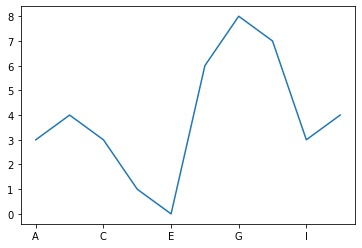

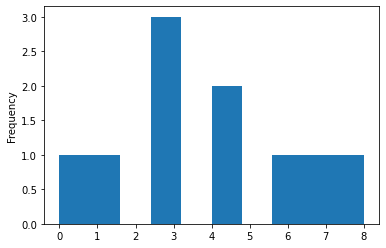

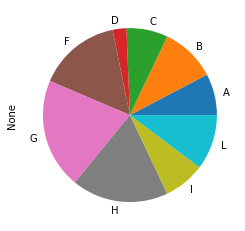

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random 
S = pd.Series([random.randint(0,10) for x in range(0,10)], 
              index = list("ABCDEFGHIL"))
print("The data:")
print(S)

S.plot()
plt.show()
plt.close()
S.plot(kind = "hist")
plt.show()
plt.close()
S.plot(kind = "pie")
plt.show()
plt.close()

**Example:** 
Let's create a series representing the sin, cos and sqrt functions and plot them.

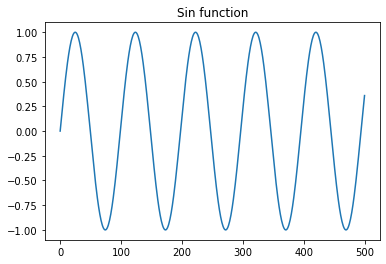

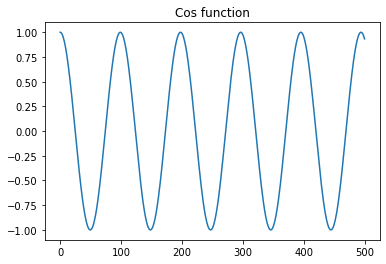

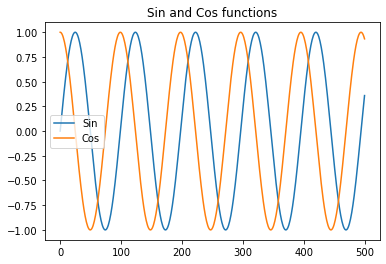

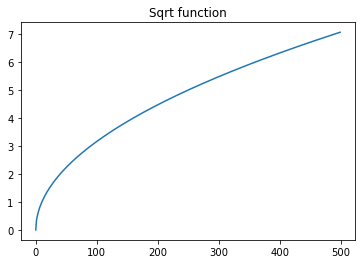

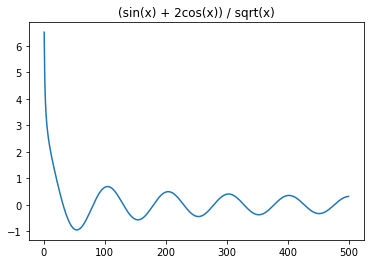

In [2]:
import math
import matplotlib.pyplot as plt
import pandas as pd

x = [i/10 for i in range(0,500)]


y =  [math.sin(2*i/3.14 ) for i in x]
y1 = [math.cos(2*i/3.14 ) for i in x]
y2 = [math.sqrt(i) for i in x]
#print(x)

ySeries = pd.Series(y)
ySeries1 = pd.Series(y1)
ySeries2 = pd.Series(y2)

ySeries.plot()
plt.title("Sin function")
plt.show()
plt.close()
ySeries1.plot()
plt.title("Cos function")
plt.show()
plt.close()
plt.title("Sin and Cos functions")
ySeries.plot()
ySeries1.plot()
plt.legend(["Sin", "Cos"])
plt.show()
plt.close()

ySeries2.plot()
plt.title("Sqrt function")
plt.show()
plt.close()
ySeries2 = (ySeries + 2*ySeries1)/ySeries2
ySeries2.plot()
plt.title("(sin(x) + 2cos(x)) / sqrt(x)")
plt.show()


## Pandas DataFrames

DataFrames in pandas are the 2D analogous of Series. Dataframes are spreadsheet-like data structures with an ordered set of columns that can also be dishomogeneous. We can think about Dataframes as dictionaries of Series, each one representing a named column.
Dataframes are described by an **index** that contains the labels of rows and a **columns** structure that holds the labels of the columns.

**Note that the operation of extracting a column from a DataFrame returns a Series**. Moreover, most (but not all!) of the operations that apply to Series also apply to DataFrames.

### Define a DataFrame

There are several different ways to define a DataFrame. It is possible to create a DataFrame starting from a dictionary having Series as values. In this case, they **keys** of the dictionary are the **columns** of the DataFrame.

In [12]:
import pandas as pd

myData = {
    "temperature" : pd.Series([1, 3, 8, 13, 17, 20, 22, 22,18 ,13,6,2],
                            index = ["Jan","Feb", "Mar","Apr","May","Jun",
                                     "Jul","Aug","Sep","Oct","Nov","Dec"]
                             ),
    "dayLength" : pd.Series([9.7, 10.9, 12.5, 14.1, 15.6, 16.3, 15.9,
                             14.6,13,11.4,10,9.3],
                            index = ["Jan","Feb", "Mar","Apr","May","Jun",
                                     "Jul","Aug","Sep","Oct","Nov","Dec"]
                             )
    
}

DF = pd.DataFrame(myData)
print(DF)

print(DF.columns)
print(DF.index)

     temperature  dayLength
Jan            1        9.7
Feb            3       10.9
Mar            8       12.5
Apr           13       14.1
May           17       15.6
Jun           20       16.3
Jul           22       15.9
Aug           22       14.6
Sep           18       13.0
Oct           13       11.4
Nov            6       10.0
Dec            2        9.3
Index(['temperature', 'dayLength'], dtype='object')
Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')


If the index is not specified, it is given by default:

    temperature  dayLength
0             1        9.7
1             3       10.9
2             8       12.5
3            13       14.1
4            17       15.6
5            20       16.3
6            22       15.9
7            22       14.6
8            18       13.0
9            13       11.4
10            6       10.0
11            2        9.3
RangeIndex(start=0, stop=12, step=1)


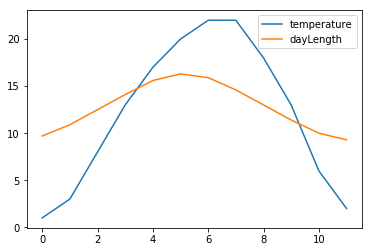

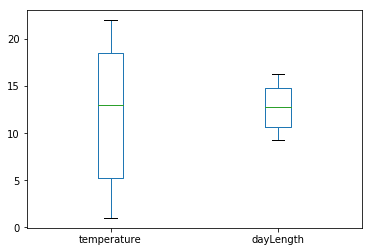

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

myData = {
    "temperature" : pd.Series([1, 3, 8, 13, 17, 20, 
                               22, 22,18 ,13,6,2]),
    "dayLength" : pd.Series([9.7, 10.9, 12.5, 14.1, 15.6, 
                             16.3,15.9,14.6,13,11.4,10,9.3])
    
}

DF = pd.DataFrame(myData)
print(DF)
print(DF.index)

DF.plot()
plt.show()
plt.close()
DF.plot(kind ="box")
plt.show()

It is also possible to define a DataFrame from a list of dictionaries holding a set of values rather than Series. Note that when columns do not have the corresponding information a NaN is added.
Indexes and columns can be changed after they have been defined.

In [14]:
import pandas as pd

myData = [{"A" : 1, "B" : 2, "C" : 3.2, "D" : 10},
          {"A" : 1, "B" : 2, "F" : 3.2, "G" : 10, "H":1},
          {"A" : 1, "B" : 2, "C" : 3.2, "D" : 1, 
           "E": 4.1, "F" : 3.2, "G" : 10, "H":1}
          
         ]

DF = pd.DataFrame(myData)
print(DF)
print("")
#Let's change the columns and indexes
columns = "val1,val2,val3,val4,val5,val6,val7,val8".split(',')
inds = ["Day1", "Day2", "Day3"]

DF.columns = columns
DF.index = inds
print(DF)

   A  B    C     D    F     G    H    E
0  1  2  3.2  10.0  NaN   NaN  NaN  NaN
1  1  2  NaN   NaN  3.2  10.0  1.0  NaN
2  1  2  3.2   1.0  3.2  10.0  1.0  4.1

      val1  val2  val3  val4  val5  val6  val7  val8
Day1     1     2   3.2  10.0   NaN   NaN   NaN   NaN
Day2     1     2   NaN   NaN   3.2  10.0   1.0   NaN
Day3     1     2   3.2   1.0   3.2  10.0   1.0   4.1


### Loading data from external files 

Pandas also provides methods to load data from external files. In particular, to load data from a .cvs file, we can use the method ```pandas.read_csv(filename)```. This method has a lot of parameters, you can see all the details on its usage on the [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Some useful optional parameters are the **separator** (to specify the column separator like ```sep="\t"``` for tab separated files), the character to identify comments (```comment="#"```) or that to skip some lines (like the header for example or any initial comments to the file) ```skiprows=N```.  The rows to use as column header can be specified with the parameter ```header``` that accepts a number or a list of numbers. Similarly, the columns to use as index can be specified with the parameter ```index_col```.

Another method to read data in is ```pandas.read_excel(filename)``` that works in a similar way but can load excel files (see [here](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html)). 

**Example:** 
Let's load the data stored in a csv datafile [sampledata_orders.csv](file_samples/sampledata_orders.csv) in a pandas DataFrame. 

In [15]:
import pandas as pd

orders = pd.read_csv("file_samples/sampledata_orders.csv", 
                     sep=",", index_col = 0, header = 0)
print("First 5 entries:")
print(orders.head())
print("")
print("The index:")
print(orders.index)
print("")
print("The column names:")
print(orders.columns)
print("")
print("A description of the numerical values:")
print(orders.describe())




First 5 entries:
        Order ID  Order Date Order Priority  Order Quantity       Sales  \
Row ID                                                                    
1              3  10/13/2010            Low               6    261.5400   
49           293   10/1/2012           High              49  10123.0200   
50           293   10/1/2012           High              27    244.5700   
80           483   7/10/2011           High              30   4965.7595   
85           515   8/28/2010  Not Specified              19    394.2700   

        Discount       Ship Mode   Profit  Unit Price  Shipping Cost  \
Row ID                                                                 
1           0.04     Regular Air  -213.25       38.94          35.00   
49          0.07  Delivery Truck   457.81      208.16          68.02   
50          0.01     Regular Air    46.71        8.69           2.99   
80          0.08     Regular Air  1198.97      195.99           3.99   
85          0.08     Regu

### Extract values by row and column

Once a DataFrame is populated we can access its content. Several options are available:
    
1. Select by column ```DataFrame[col]``` returns a Series

2. Select by row label ```DataFrame.loc[row_label]``` returns a Series

3. Select row by integer location ```DataFrame.iloc[row_position]``` returns a Series

4. Slice rows ```DataFrame[S:E]``` (S and E are labels, both included) returns a DataFrame

5. Select rows by boolean vector ```DataFrame[bool_vect]``` returns a DataFrame

**Note that if names are well formed (i.e. no spaces, no strange characters...**) we can use DataFrame.col instead of DataFrame[col].
Here are some ways to extract data from the orders dataframe:

In [16]:
import pandas as pd

orders = pd.read_csv("file_samples/sampledata_orders.csv", sep=",", index_col =0, header=0)

print("The Order Quantity column (top 5)")
print(orders["Order Quantity"].head(5))
print("")
print("The Sales column (top 10)")
print(orders.Sales.head(10))
print("")
print("The row with ID:50")
r50 = orders.loc[50]
print(r50)
print("")
print("The third row:")
print(orders.iloc[3])

print("The Order Quantity, Sales, Discount and Profit of the 2nd,4th, 6th and 8th row:")
print(orders[1:8:2][["Order Quantity", "Sales","Discount", "Profit"]])
print("The Order Quantity, Sales, Discount and  Profit of orders with discount > 10%:")
print(orders[orders["Discount"] > 0.1][["Order Quantity", "Sales","Discount", "Profit"]])

The Order Quantity column (top 5)
Row ID
1      6
49    49
50    27
80    30
85    19
Name: Order Quantity, dtype: int64

The Sales column (top 10)
Row ID
1        261.5400
49     10123.0200
50       244.5700
80      4965.7595
85       394.2700
86       146.6900
97        93.5400
98       905.0800
103     2781.8200
107      228.4100
Name: Sales, dtype: float64

The row with ID:50
Order ID                                                             293
Order Date                                                     10/1/2012
Order Priority                                                      High
Order Quantity                                                        27
Sales                                                             244.57
Discount                                                            0.01
Ship Mode                                                    Regular Air
Profit                                                             46.71
Unit Price                       

### Broadcasting, filtering and computing stats

These work pretty much like on Series and pandas takes care of adding NaNs when it cannot perform some operations due to missing values and so on. 

Obviously some operators, when applied to entire tables, might not always make sense (like mean or sum of strings).

In [17]:
import pandas as pd

orders = pd.read_csv("file_samples/sampledata_orders.csv", sep=",", index_col =0, header=0)

orders_10 = orders[["Sales","Profit", "Product Category"]].head(10)
orders_5 = orders[["Sales","Profit", "Product Category"]].head()
orders_20 = orders[["Sales","Profit", "Product Category"]].head(20)
print(orders_20)
print("")

#Summing over the entries, does not make sense but...
print("Top10 + Top5:")
print(orders_10 + orders_5)
print("")

prod_cost = orders_20["Sales"] - orders_20["Profit"]
print(prod_cost)

print("")
print("Technology orders")
print(orders_20[orders_20["Product Category"] == "Technology"])
print("")
print("Office Supplies positive profit")
print(orders_20[ (orders_20["Product Category"] == "Office Supplies") & (orders_20["Profit"] >0) ])

             Sales   Profit Product Category
Row ID                                      
1         261.5400  -213.25  Office Supplies
49      10123.0200   457.81  Office Supplies
50        244.5700    46.71  Office Supplies
80       4965.7595  1198.97       Technology
85        394.2700    30.94  Office Supplies
86        146.6900     4.43        Furniture
97         93.5400   -54.04  Office Supplies
98        905.0800   127.70  Office Supplies
103      2781.8200  -695.26  Office Supplies
107       228.4100  -226.36  Office Supplies
127       196.8500  -166.85  Office Supplies
128       124.5600   -14.33  Office Supplies
134       716.8400   134.72  Office Supplies
135      1474.3300   114.46       Technology
149        80.6100    -4.72  Office Supplies
160      1815.4900   782.91        Furniture
161       248.2600    93.80  Office Supplies
175      4462.2300   440.72        Furniture
176       663.7840  -481.04        Furniture
203       834.9040   -11.68       Technology

Top10 + T

Statistics can be computed by **column** (normally the default) or by **row** (specifying ```axis=1```)  or on the **entire table**.

[Here](http://pandas.pydata.org/pandas-docs/version/0.20/api.html#api-dataframe-stats) you can find the complete list of methods that can be applied. The file ```random.csv``` required to run the following example is provided here: [random.csv](file_samples/random.csv)

In [18]:
import pandas as pd

data = pd.read_csv("file_samples/random.csv", sep=",", header=0)

print("Global description")
print(data.describe())
print("")

print(data)
print("")

print("Let's reduce A in [0,1]")
print(data["A"]/ data["A"].max())

print("Let's reduce first row in [0,1]")
print(data.iloc[0]/ data.loc[0].max())

print("Mean and std values (by column)")
print(data.mean())
print(data.std())
print("")
print("Mean and std values (by column) - top 10 values")
print(data.head(10).mean(axis=1))
print(data.head(10).std(axis=1))

print("Cumulative sum (by column)- top 10 rows")
print(data.head(10).cumsum())

print("Cumulative sum (by row) - top 10 rows")
print(data.head(10).cumsum(axis = 1 ))

Global description
               A          B           C          D           E          F  \
count  50.000000  50.000000   50.000000  50.000000   50.000000  50.000000   
mean   45.240000  49.760000   54.120000  50.500000   57.860000  49.180000   
std    28.393417  32.193015   25.165282  28.321226   32.443364  28.488229   
min     0.000000   0.000000    5.000000   1.000000    2.000000   1.000000   
25%    21.750000  18.000000   35.750000  28.250000   29.250000  25.000000   
50%    42.000000  49.500000   52.500000  49.500000   68.000000  52.000000   
75%    63.250000  76.250000   73.750000  76.000000   86.750000  75.500000   
max    99.000000  99.000000  100.000000  95.000000  100.000000  97.000000   

                G         H          I           L  
count   50.000000  50.00000  50.000000   50.000000  
mean    49.780000  47.78000  46.920000   51.780000  
std     29.673248  29.75978  31.056788   30.613649  
min      1.000000   1.00000   0.000000    3.000000  
25%     26.500000  24.


### Merging DataFrames

It is possible to merge together DataFrames having a common column name. The merge can be done with the pandas ```merge``` method. Upon merging, the two tables will be concatenated into a bigger one containing information from both DataFrames. The basic syntax is: 

```
pandas.merge(DataFrame1, DataFrame2, on="col_name", how="inner/outer/left/right")
```

The column on which the merge has to be performed is specified with the parameter ```on``` followed by the column name, while the behaviour of the merging depends on the parameter ```how``` that tells pandas how to behave when dealing with non-matching data. In particular:
    
    1. how = inner : non-matching entries are discarded;
    2. how = left : ids are taken from the first DataFrame;
    3. how = right : ids are taken from the second DataFrame;
    4. how = outer : ids from both are retained.



In [19]:
import pandas as pd

Snp1 = {"id": ["SNP_FB_0411211","SNP_FB_0412425","SNP_FB_0942385", 
               "CH01f09","Hi05f12x","SNP_FB_0942712" ],
        "type" : ["SNP","SNP","SNP","SSR","SSR","SNP"]        
       }
Snp2 = {"id" : ["SNP_FB_0411211","SNP_FB_0412425",
                "SNP_FB_0942385", "CH01f09","SNP_FB_0428218" ],
      "chr" : ["1", "15","7","9","1"]
     }

DFs1 = pd.DataFrame(Snp1)
DFs2 = pd.DataFrame(Snp2)

print(DFs1)
print(DFs2)
print("")
print("Inner merge (only common in both)")
inJ = pd.merge(DFs1,DFs2, on = "id", how = "inner")
print(inJ)
print("")
print("Left merge (IDS from DFs1)")
leftJ = pd.merge(DFs1,DFs2, on = "id", how = "left")
print(leftJ)
print("")
print("Right merge (IDS from DFs2)")
rightJ = pd.merge(DFs1,DFs2, on = "id", how = "right")
print(rightJ)
print("")
print("Outer merge (IDS from both)")
outJ = pd.merge(DFs1,DFs2, on = "id", how = "outer")
print(outJ)

               id type
0  SNP_FB_0411211  SNP
1  SNP_FB_0412425  SNP
2  SNP_FB_0942385  SNP
3         CH01f09  SSR
4        Hi05f12x  SSR
5  SNP_FB_0942712  SNP
               id chr
0  SNP_FB_0411211   1
1  SNP_FB_0412425  15
2  SNP_FB_0942385   7
3         CH01f09   9
4  SNP_FB_0428218   1

Inner merge (only common in both)
               id type chr
0  SNP_FB_0411211  SNP   1
1  SNP_FB_0412425  SNP  15
2  SNP_FB_0942385  SNP   7
3         CH01f09  SSR   9

Left merge (IDS from DFs1)
               id type  chr
0  SNP_FB_0411211  SNP    1
1  SNP_FB_0412425  SNP   15
2  SNP_FB_0942385  SNP    7
3         CH01f09  SSR    9
4        Hi05f12x  SSR  NaN
5  SNP_FB_0942712  SNP  NaN

Right merge (IDS from DFs2)
               id type chr
0  SNP_FB_0411211  SNP   1
1  SNP_FB_0412425  SNP  15
2  SNP_FB_0942385  SNP   7
3         CH01f09  SSR   9
4  SNP_FB_0428218  NaN   1

Outer merge (IDS from both)
               id type  chr
0  SNP_FB_0411211  SNP    1
1  SNP_FB_0412425  SNP   15
2  SNP_FB

Note that the columns we merge on do not necessarily need to be the same, we can specify a correspondence between the row of the first dataframe (the one on the left) and the second dataframe (the one on the right) specifying which columns must have the same values to perform the merge. This can be done by using the parameters ```right_on = column_name``` and ```left_on = column_name```:

In [20]:
import pandas as pd

d = dict({"A" : [1,2,3,4], "B" : [3,4,73,13]})
d2 = dict({"E" : [1,4,3,13], "F" : [3,1,71,1]})

DF = pd.DataFrame(d)
DF2 = pd.DataFrame(d2)

merged_onBE = DF.merge(DF2, left_on = 'B', right_on = 'E', how = "inner")
merged_onAF = DF.merge(DF2, right_on = "F", left_on = "A", how = "outer")
print("DF:")
print(DF)
print("DF2:")
print(DF2)
print("\ninner merge on BE")
print(merged_onBE)
print("\nouter merge on AF:")
print(merged_onAF)



DF:
   A   B
0  1   3
1  2   4
2  3  73
3  4  13
DF2:
    E   F
0   1   3
1   4   1
2   3  71
3  13   1

inner merge on BE
   A   B   E   F
0  1   3   3  71
1  2   4   4   1
2  4  13  13   1

outer merge on AF:
     A     B     E     F
0  1.0   3.0   4.0   1.0
1  1.0   3.0  13.0   1.0
2  2.0   4.0   NaN   NaN
3  3.0  73.0   1.0   3.0
4  4.0  13.0   NaN   NaN
5  NaN   NaN   3.0  71.0


### Grouping

Given a DataFrame, it is possible to apply the so called **split-apply-aggregate** processing method. Basically, this helps to group the data according to the value of some columns, apply a function on the different groups and aggregate the results in a new DataFrame.

Grouping of a DataFrame can be done by using the **DataFrame.groupby(columnName)** method which returns a ```pandas.DataFrameGroupBy``` object, which basically is composed of two information: the **name** shared by each group and a **DataFrame** containing all the elements belonging to that group.

Given a grouped DataFrame, each group can be obtained with the **get_group(groupName)** it is also possible to loop over the groups:
```
for groupName, groupDataFrame in grouped:
    #do something
```
It is also possible to aggregate the groups by applying some functions to each of them (please refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.20/api.html#api-dataframe-stats)).

Let's see these things in action.

**Example** Given a list of labels and integers group them by label and compute the mean of all values in each group.

In [21]:
import pandas as pd

test = {"x": ["a","a", "b", "b", "c", "c" ],
        "y" : [2,4,0,5,5,10]        
       }

DF = pd.DataFrame(test)
print(DF)
print("")
gDF = DF.groupby("x")
for i,g in gDF:
    print("Group: ", i)
    print(g)
    print(type(g))
    
aggDF = gDF.aggregate(pd.DataFrame.mean)
print(aggDF)

#without looping through the groups...
print("\nThe 'a' group:")
print(gDF.get_group('a'))
print("\nThe 'c' group:")
print(gDF.get_group('c'))


   x   y
0  a   2
1  a   4
2  b   0
3  b   5
4  c   5
5  c  10

Group:  a
   x  y
0  a  2
1  a  4
<class 'pandas.core.frame.DataFrame'>
Group:  b
   x  y
2  b  0
3  b  5
<class 'pandas.core.frame.DataFrame'>
Group:  c
   x   y
4  c   5
5  c  10
<class 'pandas.core.frame.DataFrame'>
     y
x     
a  3.0
b  2.5
c  7.5

The 'a' group:
   x  y
0  a  2
1  a  4

The 'c' group:
   x   y
4  c   5
5  c  10


**Example** 
Given the orders data seen above, let's get the columns "Sales", "Profit" and "Product Category" and compute the total sum and the mean of the sales and profits for each product category.

             Sales   Profit Product Category
Row ID                                      
1         261.5400  -213.25  Office Supplies
49      10123.0200   457.81  Office Supplies
50        244.5700    46.71  Office Supplies
80       4965.7595  1198.97       Technology
85        394.2700    30.94  Office Supplies


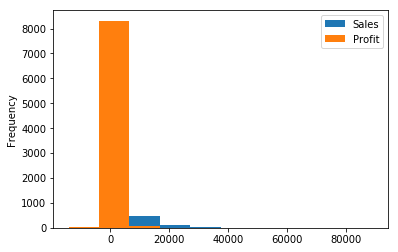


Group:  Furniture
Group:  Office Supplies
Group:  Technology

Count elements per category:
Office Supplies    4610
Technology         2065
Furniture          1724
Name: Product Category, dtype: int64

Total values:
                        Sales
Product Category             
Furniture         5178590.542
Office Supplies   3752762.100
Technology        5984248.182
Mean values (sorted by profit):
                        Sales      Profit
Product Category                         
Furniture         3003.822820   68.116607
Office Supplies    814.048178  112.369072
Technology        2897.941008  429.207516

The most profitable is Technology


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

orders = pd.read_csv("file_samples/sampledata_orders.csv", sep=",",
                     index_col =0, header=0)

SPC = orders[["Sales","Profit", "Product Category"]]
print(SPC.head())

SPC.plot(kind = "hist", bins = 10)
plt.show()

print("")
grouped = SPC.groupby("Product Category")
for i,g in grouped:
    print("Group: ", i)

print("")
print("Count elements per category:") #get the series corresponding to the column
                                      #and apply the value_counts() method
print(orders["Product Category"].value_counts())    
print("")
print("Total values:")
print(grouped.aggregate(pd.DataFrame.sum)[["Sales"]])

print("Mean values (sorted by profit):")
mv_sorted = grouped.aggregate(pd.DataFrame.mean).sort_values(by="Profit")
print(mv_sorted)
print("")
print("The most profitable is {}".format(mv_sorted.index[-1]))


## Exercises


1. The file [top_3000_words.txt](file_samples/top_3000_words.txt) is a one-column file representing the top 3000 English words. Read the file and for each letter, count how many words start with that letter. Store this information in a dictionary. Create a pandas series from the dictionary and plot an histogram of all initials counting more than 100 words starting with them.

<div class="tggle" onclick="toggleVisibility('ex0');">Show/Hide Solution</div>
<div id="ex0" style="display:none;">

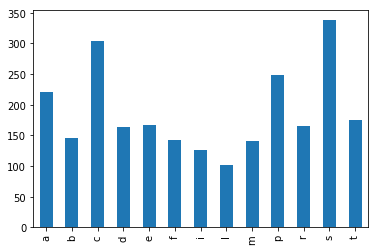

---------------------------
----- Second solution -----
---------------------------


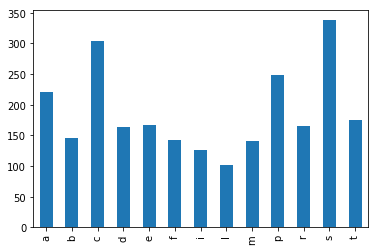

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


def readFile(file):
    fh = open(file, "r")
    initials = dict()
    for line in fh:
        line = line.strip().lower()
        init = line[0]
        if init in initials:
            initials[init] += 1
        else:
            initials[init] = 1
    fh.close()
    
    return initials


        
def filter_and_plot(data, minCount = 10):
    series = pd.Series(data)
    
    #if you want to see the content of the series uncomment:
    #print(series)
    filt_series = series[series > minCount]
    filt_series.plot(kind = 'bar')
    plt.show()


inFile = "file_samples/top_3000_words.txt"

myDict = readFile(inFile)
filter_and_plot(myDict,100)



"""Solution 2 with DataFrame"""

def readFile2(file):
    data = pd.read_csv(file, header = None)
    #print(data)
    return data

def filter_and_plot2(data, minCount = 10):
    data.columns = ['words'] #rename the column
    #Had to use lambda functions...
    #ex. lambda x : x + 1
    #check: 
    #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
    #axis = 1 means we apply the function on all raws. 
    data['initial'] = data.apply(lambda row : row['words'][0].lower(), axis = 1)
    #uncomment to see the data
    #print(data)
    d = data['initial'].value_counts() #An histogram!
    d = d.sort_index()
    #uncomment to see the final data
    #print(d)
    filt_data = d[d > minCount]
    filt_data.plot(kind = 'bar')
    plt.show()

print("---------------------------")
print("----- Second solution -----")
print("---------------------------")
d = readFile2(inFile)
filter_and_plot2(d,100)


</div>

2. Download the [train.csv](file_samples/train.csv) dataset. As the name says it is a .csv file. The file contains information regarding loans given or refused to applicants. Information on the gender, marital status, education, work and income of the applicant is reported alongside the amount and length of the loan and credit history (i.e. 0 if no previous loan was given, 1 otherwise). 
 Open it in a text editor or excel and inspect it first. 
 Then, answer the following questions (if you have any doubts check [here](http://pandas.pydata.org/pandas-docs/version/0.20/api.html)):

    - Load it into a pandas DataFrame (use column ```Loan_ID``` as index. Hint: use parm index_col).
    
    - Get an idea of the data by visualizing its first 5 entries; 
    
    - How many total entries are present in the file? 
    How many males and females?
    
    - What is the average applicant income? Does the gender 
    affect the income? Compute the average of the
    applicant income on the whole dataset and the average of 
    the data grouped by Gender. How many Females have an 
    income > than the average?
    
    - How many loans have been given (i.e. Loan_Status equals Y)?
    What is the percentage of the loans given and that of the
    loans refused?
    
    - What is the percentage of given/refused loans in the case
    of married people?
    
    - What is the percentage of given/refused loans in the case 
    of applicants with positive credit history (i.e. Credit_History 
    equals 1)?
    

<div class="tggle" onclick="toggleVisibility('ex2');">Show/Hide Solution</div>
<div id="ex2" style="display:none;">

         Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0         NaN             360.0   
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


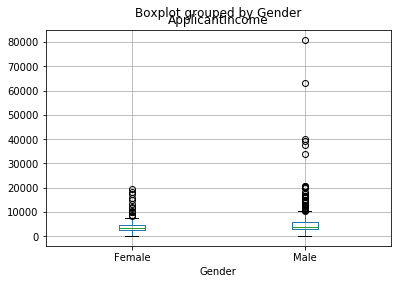

Female applicants with income higher than avg (5403.459283387622): 21
          Gender  ApplicantIncome
Loan_ID                          
LP001186  Female            11500
LP001392  Female             7451
LP001422  Female            10408
LP001516  Female            14866
LP001519  Female            10000
LP001708  Female            10000
LP001776  Female             8333
LP001871  Female             7200
LP001945  Female             5417
LP002142  Female             5500
LP002194  Female            15759
LP002231  Female             6000
LP002301  Female             7441
LP002377  Female             8624
LP002393  Female            10047
LP002407  Female             7142
LP002582  Female            17263
LP002634  Female            13262
LP002731  Female            18165
LP002813  Female            19484
LP002959  Female            12000

The number of given loans is: 422

The percentage of loans is the following
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64
398
The p

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("file_samples/train.csv", index_col = "Loan_ID")
#Question 1:
print(train.head())
#Question 2:
print("")
entries = train.shape[0]
print("The toal number of entries is {}".format(entries))
print("")
print("Males and Females")
print(train["Gender"].value_counts())

#Question 3:
print("")
avgIncome = train["ApplicantIncome"].mean()
print("The average income is {}".format(avgIncome))
train[["Gender", "ApplicantIncome"]].groupby("Gender").mean()
train.boxplot(column = "ApplicantIncome", by = "Gender")
plt.show()
females = train[train["Gender"] == "Female"]
fhi = females[females["ApplicantIncome"] > avgIncome][["Gender","ApplicantIncome"]]

print("Female applicants with income higher than avg ({}): {}".format(avgIncome,len(fhi)))
print(fhi)
print("")
#Question 4: 
loanSt = train["Loan_Status"].value_counts()
print("The number of given loans is: {}".format(loanSt["Y"]))
#loanSt is a Series, I can apply operator broadcasting on it
#to get the percentage
loanSt = loanSt / entries
print("")
print("The percentage of loans is the following")
print(loanSt)

#Question 5: 
loanSt =  train[train["Married"] == "Yes"]["Loan_Status"].value_counts()
married = train["Married"][train["Married"] == "Yes"].count()
print(married)
print("The percentage of loans to married people ({} applicants)".format(married))
print(loanSt/married)

#Question 6: 
loanSt =  train[train["Credit_History"] == 1]["Loan_Status"].value_counts()
chist = train["Credit_History"][train["Credit_History"] == 1].count()
print(chist)
print("The percentage of loans to applicants with credit history ({} applicants)".format(chist))
print(loanSt/chist)


</div>
3. Write a Python function that creates and returns a DataFrame having columns with the labels specified through a list taken as input, and ten rows of random integer data between 0 and 10.

- Create two random DataFrames, one with labels `l = ["A", "B", "C", "D", "E"]` and another with labels `l1 = ["W", "X", "Y", "Z"]`.  
- Print the first 5 elements of both DataFrames to inspect them, and plot the values of the two DataFrames as line charts.  
- Create a new Series `S1` with values `[1, 1, 1, 0, 0, 1, 1, 0, 0, 1]`.  
   Extract the Series corresponding to the column `"C"` of the first DataFrame and multiply it element-wise by `S1` (hint: use `Series.multiply(S1)`).  
- Add this new Series as a `"C"` column to the second DataFrame.  
- Merge the two DataFrames based on the value of `"C"`. Perform **inner**, **outer**, **left**, and **right** joins and print the results to observe the differences.

<div class="tggle" onclick="toggleVisibility('ex4');">Show/Hide Solution</div>
<div id="ex4" style="display:none;">

   A  B  C  D  E
0  1  5  7  8  5
1  7  5  1  2  4
2  2  2  7  7  0
3  2  4  3  4  6
4  4  2  5  9  9

   W   X   Y  Z
0  7  10   6  0
1  3   4   5  1
2  9   1   8  1
3  9  10   1  1
4  8   2  10  0


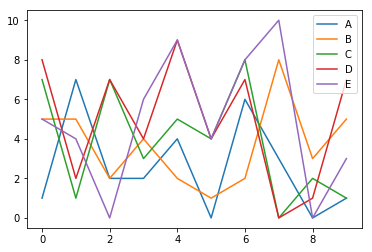

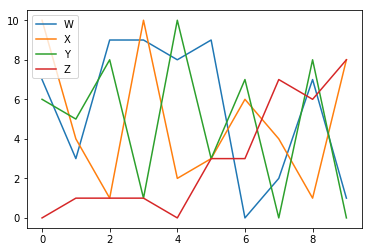

0    7
1    1
2    7
3    0
4    0
5    4
6    8
7    0
8    0
9    1
dtype: int64
   W   X   Y  Z  C
0  7  10   6  0  7
1  3   4   5  1  1
2  9   1   8  1  7
3  9  10   1  1  0
4  8   2  10  0  0
5  9   3   3  3  4
6  0   6   7  3  8
7  2   4   0  7  0
8  7   1   8  6  0
9  1   8   0  8  1
   A  B  C  D   E
0  1  5  7  8   5
1  7  5  1  2   4
2  2  2  7  7   0
3  2  4  3  4   6
4  4  2  5  9   9
5  0  1  4  4   4
6  6  2  8  7   8
7  3  8  0  0  10
8  0  3  2  1   0
9  1  5  1  7   3

Inner Join DF - DF1
    A  B  C  D   E  W   X   Y  Z
0   1  5  7  8   5  7  10   6  0
1   1  5  7  8   5  9   1   8  1
2   2  2  7  7   0  7  10   6  0
3   2  2  7  7   0  9   1   8  1
4   7  5  1  2   4  3   4   5  1
5   7  5  1  2   4  1   8   0  8
6   1  5  1  7   3  3   4   5  1
7   1  5  1  7   3  1   8   0  8
8   0  1  4  4   4  9   3   3  3
9   6  2  8  7   8  0   6   7  3
10  3  8  0  0  10  9  10   1  1
11  3  8  0  0  10  8   2  10  0
12  3  8  0  0  10  2   4   0  7
13  3  8  0  0  10  7   1  

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import random

def createRandomDF(labels):
    """ returns a random dataframe with columns having names equal to the
    input labels"""
    tmp_dict = {}
    for l in labels:
        tmp_dict[l] = []
        for i in range(0,10):
            tmp_dict[l].append(random.randint(0,10))
    
    DF = pd.DataFrame(tmp_dict)
    return DF

#Question 1
l = ["A", "B", "C" ,"D","E"]
l1 = [ "W", "X","Y","Z"] 
df = createRandomDF(l)
df1 = createRandomDF(l1)

#Question 2
print(df.head())
print("")
print(df1.head())
plt.close()
df.plot(kind = "line")
plt.show()
plt.close()
df1.plot(kind = "line")
plt.show()

#Question 3
S1 = pd.Series( [ 1, 1, 1, 0, 0, 1, 1, 0,0,1])
Sc = df["C"]
c1 = Sc.multiply(S1)
print(c1)

#Question 4
df1["C"] = c1
print(df1)
print(df)
#Question 5
inJ = pd.merge(df,df1, how ="inner")
print("")
print("Inner Join DF - DF1")
print(inJ)
outJ = pd.merge(df,df1, how ="outer")
print("")
print("Outer Join DF - DF1")
print(outJ)
print("")
print("Left Join DF - DF1")
lJ = pd.merge(df,df1, on = "C", how ="left")
print(lJ)
print("")
print("Right Join DF - DF1")
rJ = pd.merge(df,df1, on = "C", how ="right")
print(rJ)

</div>

4. Using the dataset  [Netflix Movies and TV Shows](DATASETS/modulo8/netflix_titles.csv) , load the file netflix_titles.csv into a pandas DataFrame.

Perform the following tasks:
 - Display the total number of TV Shows and Movies.
 - Find the top 5 countries with the highest number of Netflix titles.
 - Plot a bar chart showing these top 5 countries.

<div class="tggle" onclick="toggleVisibility('ex4_chat');">Show/Hide Solution</div> <div id="ex4_chat" style="display:none;">

Total entries: 8807
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: count, dtype: int64


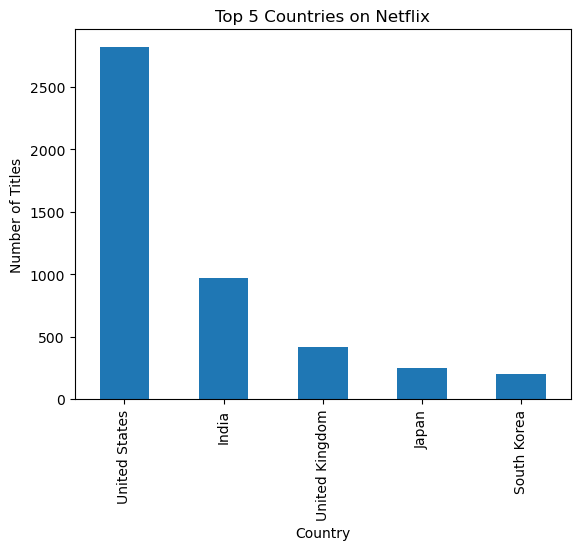

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

path = "DATASETS/modulo8/netflix_titles.csv"
df = pd.read_csv(path)

print("Total entries:", len(df))
print(df["type"].value_counts())


top_countries = df["country"].value_counts().head(5)
print(top_countries)

top_countries.plot(kind="bar", title="Top 5 Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()


</div>

5. Download the dataset [Titanic Dataset](DATASETS/modulo8/train.csv).
- Create a DataFrame from it and answer the following:
- How many passengers survived and how many didn’t?
- What was the average age of survivors and non-survivors?
- Plot a histogram showing the distribution of passenger ages by survival status.

<div class="tggle" onclick="toggleVisibility('ex5_chat');">Show/Hide Solution</div> <div id="ex5_chat" style="display:none;">

Survived
0    549
1    342
Name: count, dtype: int64
Average age by survival:
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


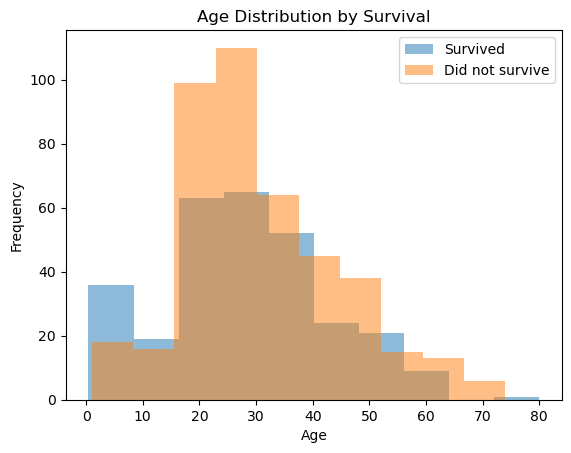

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DATASETS/modulo8/train.csv")

print(df["Survived"].value_counts())

avg_ages = df.groupby("Survived")["Age"].mean()
print("Average age by survival:")
print(avg_ages)

df[df["Survived"] == 1]["Age"].plot(kind="hist", alpha=0.5, label="Survived")
df[df["Survived"] == 0]["Age"].plot(kind="hist", alpha=0.5, label="Did not survive")
plt.legend()
plt.xlabel("Age")
plt.title("Age Distribution by Survival")
plt.show()


</div>
6. Using the Global CO₂ [Emissions Dataset](DATASETS/modulo8/emissions.csv),create a DataFrame and compute:

 - The total CO₂ emissions of Italy between 1990 and 2020.
 - The average yearly CO₂ emissions of the top 5 countries in 2020.
 - Plot a line chart showing Italy’s CO₂ emissions trend from 1960 to 2020.

<div class="tggle" onclick="toggleVisibility('ex6_chat');">Show/Hide Solution</div> 
<div id="ex6_chat" style="display:none;">

Italy CO₂ emissions (1990–2020): 13281.587000000003
Top 5 emitters in 2020:
                             country        co2
49565                          World  35126.527
33424                 Non-OECD (GCP)  23102.908
2936                            Asia  20634.852
3110                      Asia (GCP)  18029.971
48070  Upper-middle-income countries  16202.027


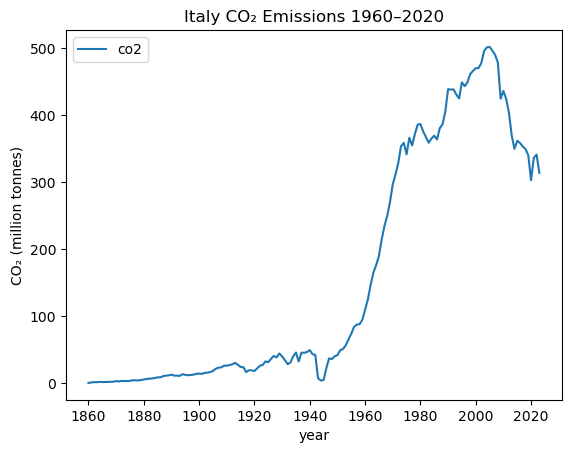

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DATASETS/modulo8/emissions.csv")

italy = df[df["country"] == "Italy"]
print("Italy CO₂ emissions (1990–2020):", italy[(italy["year"] >= 1990) & (italy["year"] <= 2020)]["co2"].sum())

top2020 = df[df["year"] == 2020].sort_values(by="co2", ascending=False).head(5)
print("Top 5 emitters in 2020:")
print(top2020[["country", "co2"]])

italy.plot(x="year", y="co2", kind="line", title="Italy CO₂ Emissions 1960–2020")
plt.ylabel("CO₂ (million tonnes)")
plt.show()


</div>

7. Use the World [Population Dataset](DATASETS/modulo8/population.csv). Perform these operations:
 - Load the dataset and select only the years from 2000 to 2020.
 - Compute the population growth rate for each country ((pop2020 - pop2000) / pop2000 * 100).
 - Display the top 10 countries with the highest growth rate.
 - Plot a horizontal bar chart of these 10 countries.


<div class="tggle" onclick="toggleVisibility('ex7_chat');">Show/Hide Solution</div> <div id="ex7_chat" style="display:none;">

                 Country Name  growth_rate_%
199                     Qatar     333.208628
8        United Arab Emirates     169.095067
88          Equatorial Guinea     144.066437
227  Turks and Caicos Islands     136.978110
22                    Bahrain     130.904260
126                    Kuwait     125.111103
4                      Angola     106.553891
172                     Niger     106.067554
228                      Chad     102.355390
117                    Jordan     101.695544


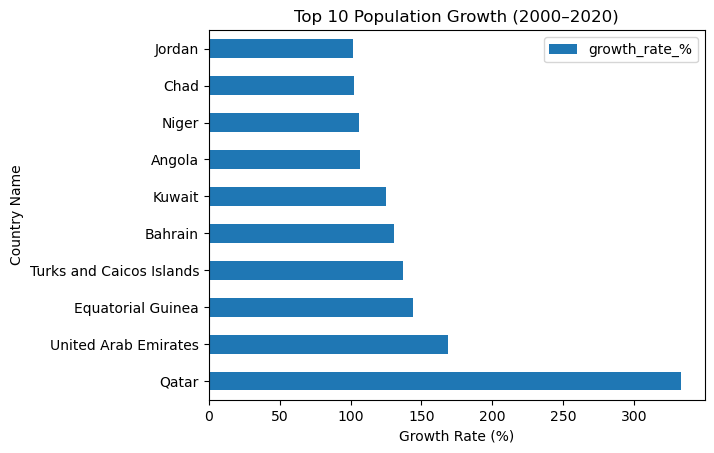

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DATASETS/modulo8/population.csv")

df2000 = df[df["Year"] == 2000][["Country Name", "Value"]].rename(columns={"Value": "pop2000"})
df2020 = df[df["Year"] == 2020][["Country Name", "Value"]].rename(columns={"Value": "pop2020"})

merged = pd.merge(df2000, df2020, on="Country Name", how="inner")
merged["growth_rate_%"] = (merged["pop2020"] - merged["pop2000"]) / merged["pop2000"] * 100

top10 = merged.sort_values(by="growth_rate_%", ascending=False).head(10)
print(top10[["Country Name", "growth_rate_%"]])

top10.plot(x="Country Name", y="growth_rate_%", kind="barh", title="Top 10 Population Growth (2000–2020)")
plt.xlabel("Growth Rate (%)")
plt.show()


</div>
 
8. Download the dataset [World Happiness Report (2008–2021)](DATASETS/modulo8/happiness.csv). Perform the following complex analysis:

- Load the dataset into a pandas DataFrame and inspect its structure.
- Compute for each country:
    * The average Life Ladder (happiness score).
    * The average Log GDP per capita.
    * The average Healthy life expectancy at birth.
    * The average Freedom to make life choices.
 - Create a composite score defined as:
    * Composite Score = 0.5 × Life Ladder + 0.3 × Log GDP per capita + 0.2 × Freedom
    
    and add it as a new column.
 - Select the top 10 countries by composite score and display all computed metrics.
 - Compute the Pearson correlation matrix between all numeric columns and visualize it as a heatmap.
 - For the top 3 composite-score countries, plot:
    * The evolution of Life Ladder and Log GDP per capita across years (two lines on the same plot).
    * A rolling mean (window=3) of Life Ladder to visualize its trend.
 - Finally, compute and display the country with the largest increase in happiness between its first and last recorded year.

<div class="tggle" onclick="toggleVisibility('ex9_chat');">Show/Hide Solution</div> <div id="ex9_chat" style="display:none;">

Dataset dimensions: (1949, 11)
  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affe

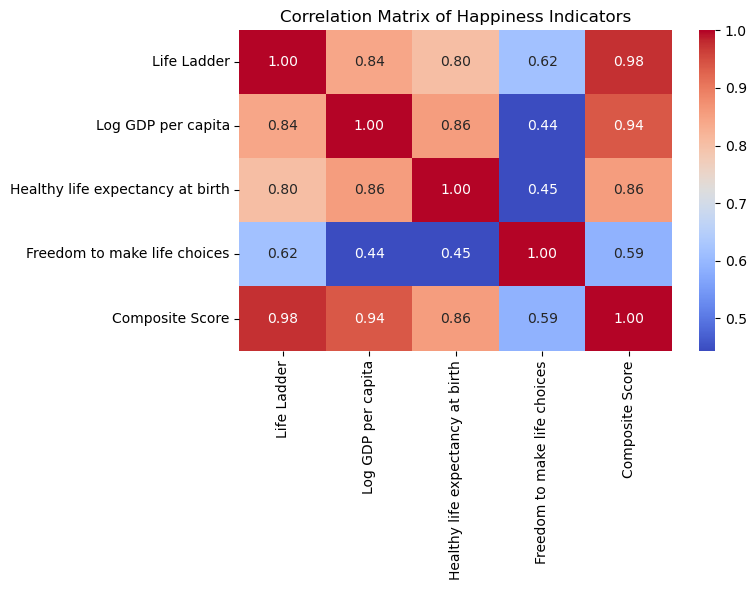

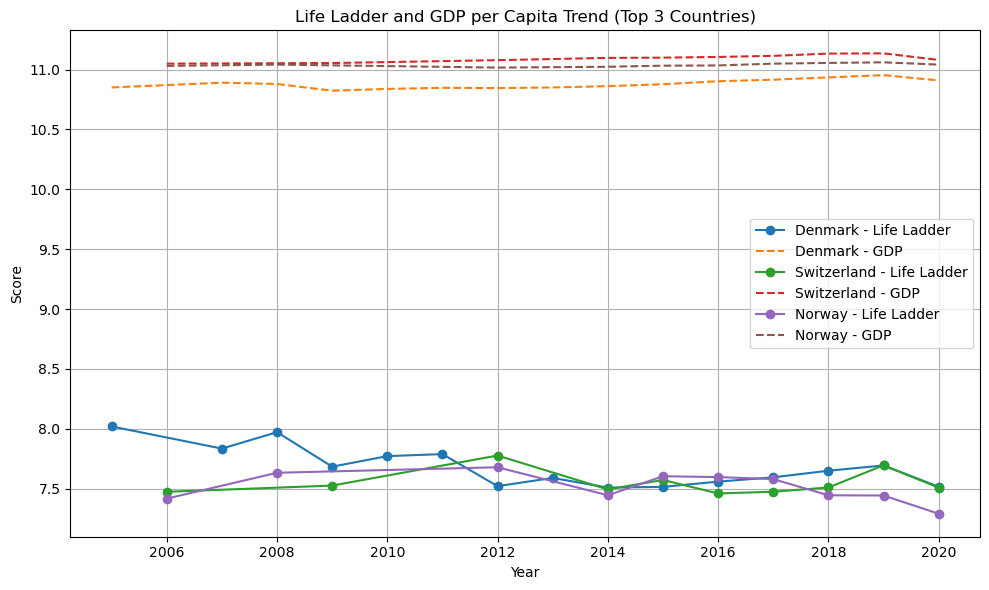

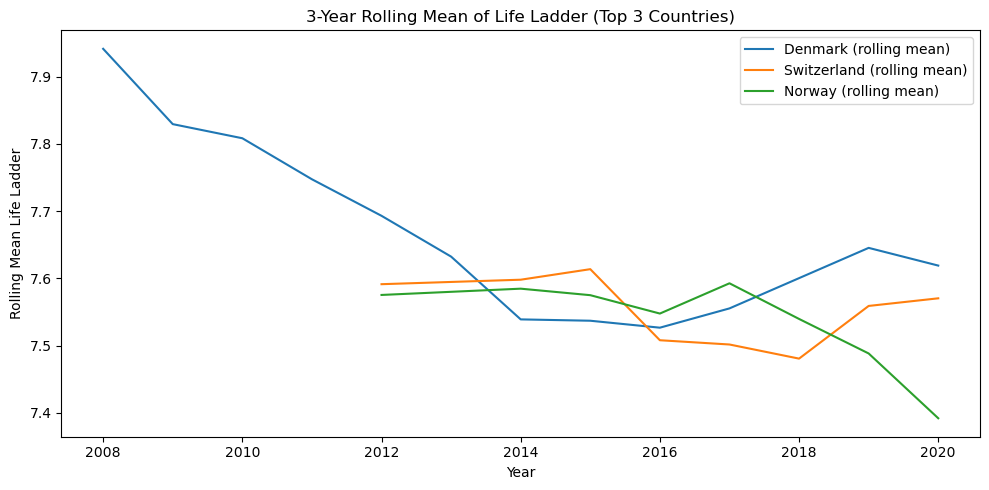


Country with largest increase in happiness: Bulgaria (+1.75 Life Ladder points)


/tmp/ipykernel_96730/1985592353.py:74: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("year")["Life Ladder"].iloc[-1] - x.sort_values("year")["Life Ladder"].iloc[0])


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "DATASETS/modulo8/happiness.csv"
df = pd.read_csv(url)

print("Dataset dimensions:", df.shape)
print(df.head())

# Step 1 - Group by Country and compute means
metrics = ["Life Ladder", "Log GDP per capita",
           "Healthy life expectancy at birth",
           "Freedom to make life choices"]

avg_df = df.groupby("Country name")[metrics].mean().dropna().reset_index()

# Step 2 - Compute composite score
avg_df["Composite Score"] = (
    0.5 * avg_df["Life Ladder"] +
    0.3 * avg_df["Log GDP per capita"] +
    0.2 * avg_df["Freedom to make life choices"]
)

# Step 3 - Top 10 countries by composite score
top10 = avg_df.sort_values(by="Composite Score", ascending=False).head(10)
print("\nTop 10 countries by composite score:\n")
print(top10.round(3))

# Step 4 - Correlation matrix and heatmap
corr = avg_df[metrics + ["Composite Score"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Happiness Indicators")
plt.tight_layout()
plt.show()

# Step 5 - Time series for top 3 composite countries
top3_countries = top10["Country name"].head(3).tolist()
subset = df[df["Country name"].isin(top3_countries)]

plt.figure(figsize=(10, 6))
for country in top3_countries:
    sub = subset[subset["Country name"] == country]
    plt.plot(sub["year"], sub["Life Ladder"], marker="o", label=f"{country} - Life Ladder")
    plt.plot(sub["year"], sub["Log GDP per capita"], linestyle="--", label=f"{country} - GDP")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Score")
plt.title("Life Ladder and GDP per Capita Trend (Top 3 Countries)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6 - Rolling mean visualization
plt.figure(figsize=(10, 5))
for country in top3_countries:
    sub = subset[subset["Country name"] == country]
    sub_sorted = sub.sort_values("year")
    plt.plot(sub_sorted["year"], sub_sorted["Life Ladder"].rolling(window=3).mean(),
             label=f"{country} (rolling mean)")
plt.title("3-Year Rolling Mean of Life Ladder (Top 3 Countries)")
plt.xlabel("Year")
plt.ylabel("Rolling Mean Life Ladder")
plt.legend()
plt.tight_layout()
plt.show()

# Step 7 - Country with largest increase in happiness
delta_df = (
    df.groupby("Country name")
    .apply(lambda x: x.sort_values("year")["Life Ladder"].iloc[-1] - x.sort_values("year")["Life Ladder"].iloc[0])
    .reset_index(name="Happiness Change")
    .dropna()
)

max_increase = delta_df.loc[delta_df["Happiness Change"].idxmax()]
print(f"\nCountry with largest increase in happiness: {max_increase['Country name']} "
      f"(+{max_increase['Happiness Change']:.2f} Life Ladder points)")


</div>

## Exercises Difficult

1. Write a program to convert the sample data (dictionary) into a dataframe
```
Sample data: {'X':[78,85,96,80,86], 'Y':[84,94,89,83,86],'Z':[86,97,96,72,83]}
```
output:
```
    X   Y   Z                                                          
0  78  84  86                                                          
1  85  94  97                                                          
2  96  89  96                                                          
3  80  83  72                                                          
4  86  86  83 
```
<div class="tggle" onclick="toggleVisibility('ex2_1');">Show/Hide Solution</div>
<div id="ex2_1" style="display:none;">

In [4]:
import pandas as pd
sample_data = {'X':[78,85,96,80,86], 'Y':[84,94,89,83,86],'Z':[86,97,96,72,83]}
df = pd.DataFrame(sample_data)
print(df.head())

    X   Y   Z
0  78  84  86
1  85  94  97
2  96  89  96
3  80  83  72
4  86  86  83


</div>
2. Write a program to select the 'name' and 'score' columns from the following DataFrame.


Sample DataFrame:
```
exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
output:
```                                             
        name  score                                                    
a  Anastasia   12.5                                                    
b       Dima    9.0                                                    
c  Katherine   16.5                                                    
d      James    NaN                                                    
e      Emily    9.0                                                    
f    Michael   20.0                                                    
g    Matthew   14.5                                                    
h      Laura    NaN                                                    
i      Kevin    8.0                                                    
j      Jonas   19.0 
```
<div class="tggle" onclick="toggleVisibility('ex2_2');">Show/Hide Solution</div>
<div id="ex2_2" style="display:none;">

In [6]:
import pandas as pd

exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, 10, 9, 20, 14.5, 3, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(exam_data , index=labels)
print("Select specific columns:")
print(df[['name', 'score']])

Select specific columns:
        name  score
a  Anastasia   12.5
b       Dima    9.0
c  Katherine   16.5
d      James   10.0
e      Emily    9.0
f    Michael   20.0
g    Matthew   14.5
h      Laura    3.0
i      Kevin    8.0
j      Jonas   19.0


</div>
3. Write a program to convert those strings in datetime object.

```                                                 
0 3/11/2000
1 3/12/2000
2 3/13/2000
```
output:
```
0 2000-03-11
1 2000-03-12
2 2000-03-13
```

<div class="tggle" onclick="toggleVisibility('ex2_3');">Show/Hide Solution</div>
<div id="ex2_3" style="display:none;">

In [13]:
import pandas as pd

s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'])
r = pd.to_datetime(pd.Series(s))
df = pd.DataFrame(r)
print("Original DataFrame (string to datetime):")
print(df)

Original DataFrame (string to datetime):
           0
0 2000-03-11
1 2000-03-12
2 2000-03-13


</div>
4. Write a Pandas program to select all columns, except one given column in a DataFrame.
input:

```                                                 
col1 col2 col3
0 1 4 7
1 2 5 8
2 3 6 12
3 4 9 1
4 7 5 11
```
output:
```
col1 col2
0 1 4
1 2 5
2 3 6
3 4 9
4 7 5
```

<div class="tggle" onclick="toggleVisibility('ex2_4');">Show/Hide Solution</div>
<div id="ex2_4" style="display:none;">

In [15]:
import pandas as pd
d = {'col1': [1, 2, 3, 4, 7], 'col2': [4, 5, 6, 9, 5], 'col3': [7, 8, 12, 1, 11]}
df = pd.DataFrame(data=d)
print("\nAll columns except 'col3':")
df = df.loc[:, df.columns != 'col3']
print(df)


All columns except 'col3':
   col1  col2
0     1     4
1     2     5
2     3     6
3     4     9
4     7     5


</div>

## Exercise Difficult (Relational Database)

### Relational Database

Relational databases are systems that store data in structured tables connected through relationships.
Each table (also called a relation) contains rows and columns, where:

1. Each row represents a record (an observation).
2. Each column represents a field (a variable or attribute).
3. Each table has a primary key, a unique identifier for each record.
4. Tables can be connected using foreign keys, which reference primary keys in other tables.

This structure allows us to link information efficiently across multiple tables using joins (or merges).

Such systems are called relational because they organize data based on logical relationships between entities.
They ensure data integrity, reduce redundancy, and make it easier to run complex queries.

Below is an example of a relational database schema showing how tables can be connected through keys (one-to-many and many-to-one relationships):

![Database Schema](https://relbench.stanford.edu/img/rel-stack.png)


### Tasks

1. Load both CSV files into pandas DataFrames. [posts](DATASETS/modulo8/posts.csv) and [users](DATASETS/modulo8/users.csv)
    - Verify that all user_id values in posts exist in users. If not, identify the missing ones.
    - Perform a merge to combine user information (name and signup date) with each post.
    - Compute:
        * The number of posts per user.
        * The total number of likes per user.
        * The average number of likes per post for each user.
    - Create a final DataFrame with the columns: user_id, user_name, num_posts, total_likes, avg_likes_per_post, signup_date.
    - Sort the results by total likes (descending).

<div class="tggle" onclick="toggleVisibility('ex_relational_db');">Show/Hide Solution</div> <div id="ex_relational_db" style="display:none;">

In [19]:
import pandas as pd

# Load data
users = pd.read_csv("DATASETS/modulo8/users.csv")
posts = pd.read_csv("DATASETS/modulo8/posts.csv")

# 1. Verify orphan posts (posts without a matching user)
merged_check = posts.merge(users, how="left", on="user_id", indicator=True)
orphans = merged_check[merged_check["_merge"] != "both"]
print("Posts with missing user references:")
print(orphans)

# 2. Merge posts with user information
posts_users = posts.merge(users, how="inner", on="user_id")
print("\nMerged DataFrame (posts + users):")
print(posts_users.head())

# 3. Compute number of posts per user
num_posts = posts_users.groupby(["user_id", "user_name"]).size().reset_index(name="num_posts")

# 4. Compute total likes per user
likes_sum = posts_users.groupby("user_id")["likes"].sum().reset_index(name="total_likes")

# 5. Combine results
summary = num_posts.merge(likes_sum, on="user_id", how="outer")
summary = summary.merge(users[["user_id", "user_name", "signup_date"]], on="user_id", how="left")

# Compute average likes per post (avoid division by zero)
summary["avg_likes_per_post"] = summary["total_likes"] / summary["num_posts"]

# 6. Sort by total likes
summary = summary.sort_values("total_likes", ascending=False)

print("\nFinal Summary Table:")
summary

Posts with missing user references:
Empty DataFrame
Columns: [post_id, user_id, title, body, creation_date, likes, user_name, signup_date, _merge]
Index: []

Merged DataFrame (posts + users):
   post_id  user_id         title           body creation_date  likes  \
0       10        1   Hello world     First post    2023-01-10      5   
1       11        2  Data Science  Pandas is fun    2023-02-25      7   
2       12        1   Second Post   More content    2023-03-12      3   
3       13        3         Intro    Hi everyone    2022-08-05     10   
4       14        4      New Post    Just joined    2023-05-02      1   

  user_name signup_date  
0     Alice  2022-11-03  
1       Bob  2023-02-20  
2     Alice  2022-11-03  
3     Clara  2022-07-10  
4       Dan  2023-05-01  

Final Summary Table:


,user_id,user_name_x,num_posts,total_likes,user_name_y,signup_date,avg_likes_per_post
2,3,Clara,1,10,Clara,2022-07-10,10.0
0,1,Alice,2,8,Alice,2022-11-03,4.0
1,2,Bob,1,7,Bob,2023-02-20,7.0
3,4,Dan,1,1,Dan,2023-05-01,1.0
